<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/DM_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer



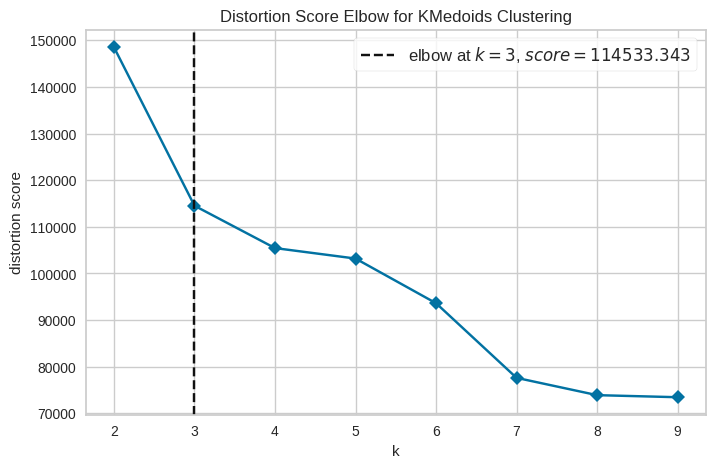

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
df = pd.read_csv("housing.csv")

df.dropna(inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(df.select_dtypes(include=[np.number]))


kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
kmedoids.fit(X)


plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(KMedoids(metric='euclidean'), k=(2, 10), timings=False)
visualizer.fit(X)
visualizer.show()




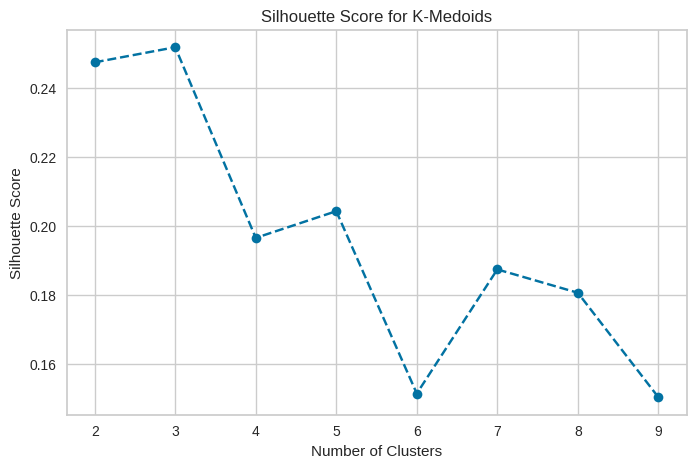

Final Cluster Labels: [5 8 5 ... 4 4 4]


In [ ]:

silhouette_scores = []
K = range(2, 10)

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42, metric='euclidean')
    kmedoids.fit(X)
    score = silhouette_score(X, kmedoids.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Medoids")
plt.show()

print("Final Cluster Labels:", kmedoids.labels_)